# Project: Investigate ford bike Dataset
## by Mohamed Ibrahim

## Investigation Overview

in this perview , I would like to figure most popular start and end staions, rush hours and activity during weekdays.
the effect of variables like(age,user type,gender,time)
## Dataset Overview

The dataset contains 183412 rows 16 columns the main aspects in the data are
- Trip Duration (in seconds)
- Start Time and Date
- End Time and Date
- Start Station Name
- End Station Name
- User Type (Subscriber or Customer)
- Member Year of Birth
- Member Gender

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [28]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.dropna(inplace=True)
ford_bike.drop(columns=['start_station_id', 'end_station_id','bike_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], inplace=True)
ford_bike.start_time = pd.to_datetime(ford_bike.start_time)
ford_bike.end_time = pd.to_datetime(ford_bike.end_time)
ford_bike['year'] = ford_bike['start_time'].dt.year
ford_bike['month'] = ford_bike['start_time'].dt.month
ford_bike['day'] = ford_bike['start_time'].dt.day
ford_bike['hour'] = ford_bike['start_time'].dt.hour
ford_bike['day'] = ford_bike.start_time.dt.strftime('%a')
ford_bike['month'] = ford_bike.start_time.dt.strftime('%b')

ford_bike['age'] = datetime.now().year - ford_bike.member_birth_year
ford_bike.drop(columns=['start_time', 'end_time','member_birth_year'], inplace=True)
ford_bike['day'] = pd.Categorical(ford_bike['day'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)
ford_bike['age'] = ford_bike['age'].astype(int)
bike_clean = ford_bike.copy()    

## the most frequent start point



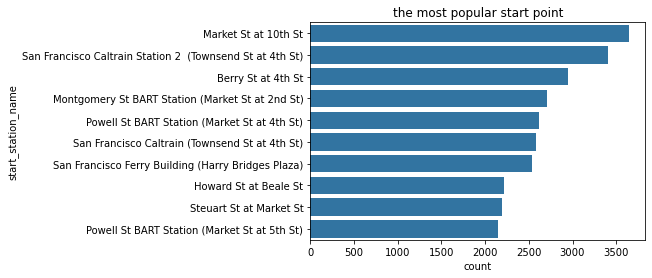

In [17]:
freq_start = bike_clean['start_station_name'].value_counts()[:10]
start_station_order = freq_start.index
sb.countplot(data=bike_clean, y='start_station_name', color=sb.color_palette()[0], order=start_station_order);
plt.title('the most popular start point');

# MARKET ST. AT 10TH ST.
 ## is the most popular start point


## the most frequent end point



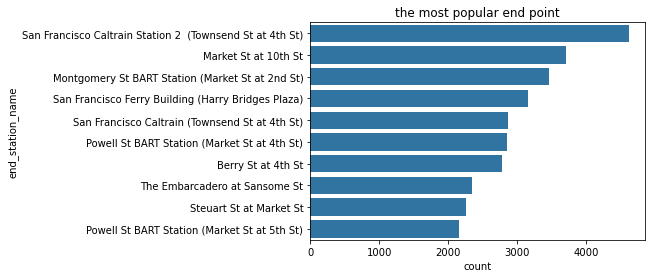

In [18]:
freq_end = bike_clean['end_station_name'].value_counts()[:10]
end_station_order = freq_end.index
sb.countplot(data=bike_clean, y='end_station_name', color=sb.color_palette()[0], order=end_station_order);
plt.title('the most popular end point');

# SAN FRANCISCO CALTRAIN STAION 2
## is the popular end point

## the average age for bike riders



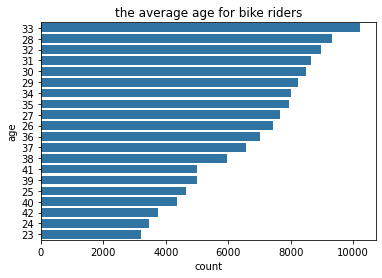

In [25]:
freq_age = bike_clean['age'].value_counts()[:20]
age_order = freq_age.index
sb.countplot(data=bike_clean, y='age', color=sb.color_palette()[0], order=age_order);
plt.title('the average age for bike riders');

# people with age 33 are common bike riders

## people with with age range(25-42) are more likely to use bikes

## people(<25) and (>42) not fammiler wih bike riding


##  the day with higher rides 

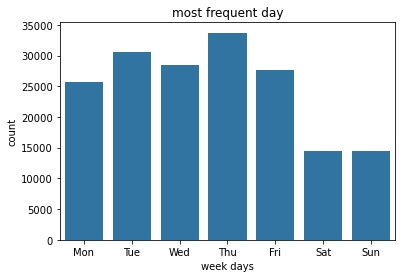

In [29]:
sb.countplot(data=bike_clean, x='day', color=sb.color_palette()[0]);
plt.xlabel('week days')
plt.title('most frequent day');

# THURSDAY has the higher rides no

# the rush hours

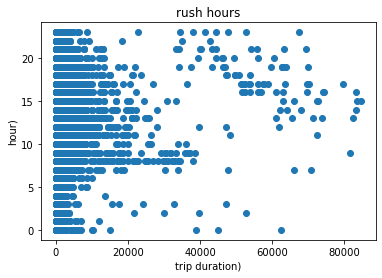

In [9]:
plt.scatter(data = bike_clean, x = 'duration_sec', y = 'hour');
plt.xlabel('trip duration)')
plt.ylabel('hour)')
plt.title('rush hours');

# trip duration increases in rush hours
## between 8 am and 15 pm

# variation in no. of rides during the week acc. to user type

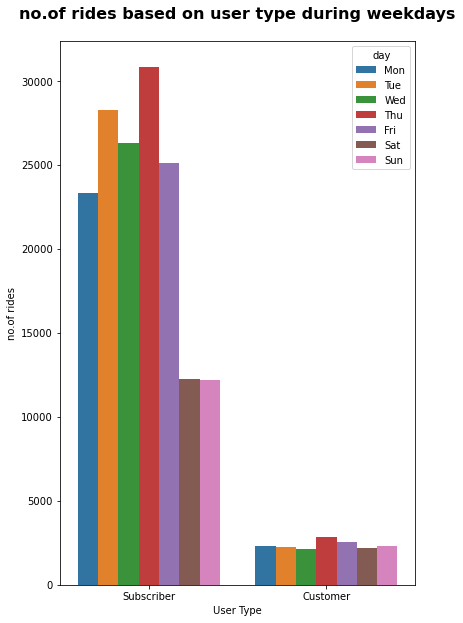

In [30]:
plt.figure(figsize = [14,10])
plt.subplot(1, 2, 1)
g = sb.countplot(data=bike_clean, x="user_type", hue="day", order=bike_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('no.of rides')
g.set_title('no.of rides based on user type during weekdays', y=1.03, fontsize=16, fontweight='semibold');

# thursday shows the highest no. of rides during the week in both subscriber and customer users
## customer has approximatley equal no. of rides during 5 days of week

In [1]:
!jupyter nbconvert explanatory.ipynb --to slides --no-input

[NbConvertApp] Converting notebook explanatory.ipynb to slides
[NbConvertApp] Writing 702257 bytes to explanatory.slides.html
